1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
2. I don't think anyone's car was built in 0AD. Discard the '0's as NaN.
3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.
4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.
5. "Violation time" is... not a time. Make it a time.
6.  There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.
7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.
8. How much money did NYC make off of parking violations?
9. What's the most lucrative kind of parking violation? The most frequent?
10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?
11. Make a chart of the top few.
12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.
13. What's the average ticket cost in NYC?
14. Make a graph of the number of tickets per day.
15. Make a graph of the amount of revenue collected per day.
16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.
17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!

In [1]:
import dateutils

In [2]:
import dateutil.parser

In [3]:
import pandas as pd

In [4]:
parking_df = pd.read_csv("small-violations.csv")
parking_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,RD,0,0,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0,2011,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN


In [5]:
parking_df.dtypes

Summons Number                         int64
Plate ID                              object
Registration State                    object
Plate Type                            object
Issue Date                            object
Violation Code                         int64
Vehicle Body Type                     object
Vehicle Make                          object
Issuing Agency                        object
Street Code1                           int64
Street Code2                           int64
Street Code3                           int64
Vehicle Expiration Date                int64
Violation Location                   float64
Violation Precinct                     int64
Issuer Precinct                        int64
Issuer Code                            int64
Issuer Command                        object
Issuer Squad                           int64
Violation Time                        object
Time First Observed                   object
Violation County                      object
Violation 

In [6]:
import datetime

In [7]:
parking_df.head()['Issue Date'].astype(datetime.datetime)

0    08/04/2013
1    08/04/2013
2    08/05/2013
3    08/05/2013
4    08/08/2013
Name: Issue Date, dtype: object

In [8]:
import pandas as pd
parking_df = pd.read_csv("small-violations.csv")
parking_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,RD,0,0,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0,2011,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN


### 1. I want to make sure my Plate ID is a string. Can't lose the leading zeroes!

In [9]:
col_plateid = { 'Plate ID': 'str',  }
violations_df = pd.read_csv("small-violations.csv", dtype=col_plateid)
violations_df.head(20)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,RD,0,0,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0,2011,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN


In [10]:
print("The data type is",(type(violations_df['Plate ID'][0])))


The data type is <class 'str'>


### 2.  I don't think anyone's car was built in 0AD. Discard the '0's as NaN.

In [11]:
type(parking_df['Vehicle Year'][0])

numpy.int64

In [12]:
# DISCOVERY - pass value as [0] rather than 0
col_types = { 'Vehicle Year': [0] }
test_df = pd.read_csv("violations.csv", na_values=col_types, nrows=10)
test_df.head(10)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013.0,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012.0,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010.0,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012.0,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,RD,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0,2011.0,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,WHITE,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0,2001.0,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0,2005.0,-,0,NaN,NaN,NaN,NaN,NaN


In [13]:

violations_df['Vehicle Year'] = violations_df['Vehicle Year'].replace("0","NaN")
violations_df.head(10)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,RD,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0,2011,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,WHITE,0,NaN,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN


### 3. I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

In [14]:
type(violations_df['Issue Date'][0])

str

In [15]:
violate_df = pd.read_csv("small-violations.csv", parse_dates=True, infer_datetime_format=True, keep_date_col=True, date_parser=True, dayfirst=True, nrows=10)

In [16]:
#violate_df['Vehicle Year'] = test1_df['Vehicle Year'].replace("0","NaN")

In [17]:
violate_df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [18]:
yourdate = dateutil.parser.parse(violate_df['Issue Date'][0])
yourdate

datetime.datetime(2013, 8, 4, 0, 0)

In [19]:
violate_df.head()['Issue Date'].astype(datetime.datetime)

0    08/04/2013
1    08/04/2013
2    08/05/2013
3    08/05/2013
4    08/08/2013
Name: Issue Date, dtype: object

### 4. "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [20]:
violate_df.columns


Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [21]:
# changing it to string because it later needs to be converted into Python time.
col_observ = { 'Date First Observed': 'str',  }
test2_df = pd.read_csv("violations.csv", dtype=col_observ, nrows=10)
test2_df.head()

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN


In [22]:
# defining conversion into python time
def to_date(num):
      
    if num == "0":
        return num.replace("0","NaN")
    else:
        yourdate = dateutil.parser.parse(num)
        date_in_py = yourdate.strftime("%Y %B %d")
        return date_in_py

to_date("20140324")


'2014 March 24'

In [23]:
# confirming its string.
type(test2_df['Date First Observed'][0])

str

In [24]:
test2_df['Date First Observed'].apply(to_date)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Date First Observed, dtype: object

In [25]:
#replacing Date First Observed with Date First Observed column as already there are so many columns.
test2_df['Date First Observed'] = test2_df['Date First Observed'].apply(to_date)


### 5. "Violation time" is... not a time. Make it a time

In [26]:
violate_df['Violation Time'].head(5)

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
Name: Violation Time, dtype: object

In [27]:
type(violate_df['Violation Time'][0])

str

In [28]:
# am replacing A and P with AM and PM to 
def str_to_time(time_str):
    s = time_str.replace("P"," PM").replace("A"," AM")
    x = x = s[:2] + ":" + s[2:]
    return x
str_to_time("1239P")

'12:39 PM'

In [29]:
test2_df['Violation Time'] = test2_df['Violation Time'].apply(str_to_time)

In [30]:
def vio_date(time_str):
    parsed_date = dateutil.parser.parse(time_str)
    date_vio = parsed_date.strftime("%H:%M %p")
    return date_vio
    #return parsed_date.hour
print(vio_date("12:32 PM"))

12:32 PM


In [31]:
test2_df['Violation Time'].apply(vio_date)
#replacing Violation Time with Date Violation Time column as already there are so many columns.
test2_df['Violation Time'] = test2_df['Violation Time'].apply(vio_date)

In [32]:
test2_df['Violation Time']

0    07:52 AM
1    12:40 PM
2    12:43 PM
3    14:32 PM
4    12:39 PM
5    18:17 PM
6    19:41 PM
7    04:25 AM
8    04:37 AM
9    08:39 AM
Name: Violation Time, dtype: object

### 6. There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [33]:
#violate_df['Vehicle Color'].count_values()
violate_df.groupby('Vehicle Color').describe()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


Date First Observed  Double Parking Violation  \
Vehicle Color                                                        
BLACK         count                  1.0                       0.0   
              mean                   0.0                       NaN   
              std                    NaN                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max                    0.0                       NaN   
BR            count                  1.0                       0.0   
              mean                   0.0                       NaN   
              std                    NaN                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max                    0.0                       NaN   
GN            count                  1.0                       0.0   
              mean                   0.0                       NaN   
              std                    NaN                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max                    0.0                       NaN   
GY            count                  1.0                       0.0   
              mean                   0.0                       NaN   
              std                    NaN                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max                    0.0                       NaN   
RD            count                  1.0                       0.0   
              mean                   0.0                       NaN   
              std                    NaN                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max                    0.0                       NaN   
WH            count                  2.0                       0.0   
              mean                   0.0                       NaN   
              std                    0.0                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max                    0.0                       NaN   
WHITE         count                  2.0                       0.0   
              mean                   0.0                       NaN   
              std                    0.0                       NaN   
              min                    0.0                       NaN   
              25%                    0.0                       NaN   
              50%                    0.0                       NaN   
              75%                    0.0                       NaN   
              max              

In [34]:
def to_color(color_str):
    if color_str == "WH":
        return str(color_str.replace("WH","White"))
    if color_str == "WHT":
        return str(color_str.replace("WHT","White"))
    if color_str == "RD":
        return str(color_str.replace("RD","Red"))
    if color_str == "BLK":
        return str(color_str.replace("BLK","BLACK"))
    if color_str == "BK":
        return str(color_str.replace("BK","BLACK"))
    if color_str == "BR":
        return str(color_str.replace("BR","Brown"))
    if color_str == "BRW":
        return str(color_str.replace("BRW","Brown"))
    if color_str == "GN":
        return str(color_str.replace("GN","Green"))
    if color_str == "GRY":
        return str(color_str.replace("GRY","Gray"))
    if color_str == "GY":
        return str(color_str.replace("GY","Gray"))
    if color_str == "BL":
        return str(color_str.replace("BL","Blue"))
    if color_str == "SILVR":
        return str(color_str.replace("SILVR","Silver"))
    if color_str == "SILVE":
        return str(color_str.replace("SILVE","Silver"))
    if color_str == "MAROO":
        return str(color_str.replace("MAROO","Maroon"))
to_color("WHT")    

'White'

In [35]:
test2_df['Vehicle Color'].apply(to_color)

0     Gray
1    White
2     None
3    White
4    Brown
5      Red
6    Green
7     None
8     None
9     None
Name: Vehicle Color, dtype: object

In [36]:
#replacing Vehicle Color with Vehicle Color column as already there are so many columns.
test2_df['Vehicle Color'] = test2_df['Vehicle Color'].apply(to_color)

In [37]:
test2_df['Vehicle Color'].head()

0     Gray
1    White
2     None
3    White
4    Brown
Name: Vehicle Color, dtype: object

### 7. Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [38]:
df_code = pd.read_csv("DOF_Parking_Violation_Codes.csv")
df_code.head(10)

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115
2,12,Snow Emergency: Standing or parking where stan...,$95,$95
3,13,Taxi Stand: Standing or parking where standing...,$115,$115
4,14,General No Standing: Standing or parking where...,$115,$115
5,16,Truck Loading/Unloading: Standing or parking w...,$95,$95
6,17,Authorized Vehicles Only: Standing or parking ...,$95,$95
7,18,Bus Lane: Standing or parking where standing i...,$115,$115
8,19,Bus Stop: Standing or parking where standing i...,$115,$115
9,20,General No Parking: No parking where parking i...,$65,$60


In [39]:
violate_df['Violation Legal Code'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: Violation Legal Code, dtype: float64

In [40]:
test2_df.join(df_code, on='Violation Code', how='left')

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,0,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,0,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,0,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,0,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,0,NaN,NaN,NaN,NaN,NaN,57,Parking a vehicle within the area designated a...,$65,$65
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,0,NaN,NaN,NaN,NaN,NaN,25,"Standing at a commuter van stop, other than te...",$115,$115
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,0,NaN,NaN,NaN,NaN,NaN,25,"Standing at a commuter van stop, other than te...",$115,$115
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,0,NaN,NaN,NaN,NaN,NaN,39,Parking for longer than the maximum time permi...,$65,$60
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,0,NaN,NaN,NaN,NaN,NaN,39,Parking for longer than the maximum time permi...,$65,$60
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,0,NaN,NaN,NaN,NaN,NaN,39,Parking for longer than the maximum time permi...,$65,$60


### 8. How much money did NYC make off of parking violations?

In [41]:
for ammount in df_code["All Other Areas"]:
    try:
        money_to_int(ammount)
    except:
        print(ammount)
        print(type(ammount))

$115 
<class 'str'>
$115 
<class 'str'>
$95 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$95 
<class 'str'>
$95 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$60 
<class 'str'>
$45 
<class 'str'>
$60 
<class 'str'>
$60 
<class 'str'>
$60 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$180 
<class 'str'>
$95 
<class 'str'>
$115 
<class 'str'>
$35 
<class 'str'>
$35 
<class 'str'>
$35 
<class 'str'>
$35 
<class 'str'>
$35 
<class 'str'>
$60 
<class 'str'>
$65 
<class 'str'>
$115 
<class 'str'>
$35 
<class 'str'>
$35 
<class 'str'>
$35 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$95 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$115 
<class 'str'>
$65 
<class 'str'>
$45 
<class 'str'>
$115 
<class 'str'>
$45 
<class 'str'>
$45 
<class 'str'>
$45 
<class 'str'>
$95 
<class 'str'>
$95 
<class 'str'>
$95 
<class 'str'>
$45 
<class 'str'>
$165 
<cl

In [42]:
def money_to_int(money_str):
    return int(money_str.replace("$","").replace(",",""))

print(money_to_int("$115"))

115


In [43]:
import re
ammount_list = []
other_area = df_code["All Other Areas"]
for ammount in other_area:
    try:
        x = money_to_int(ammount)
        ammount_list.append(x)
        #print(amount_list)
    except:
        print("made it to except")
        if isinstance(ammount,str):
            print("is a string!")
            clean = re.findall(r"\d{3}", ammount)
            z = [int(i) for i in clean]
            #print(type(z[0]))
            #print(clean)
            if len(z) > 1:
                print("z is greater than 1")
                avg = int(sum(z) / len(z))
                print(type(avg))
                #print(avg)
                ammount_list.append(avg)
            elif len(z) == 1:
                print("only one item in list!")
                print("Let's append", str(z[0]))
                ammount_list.append(z[0])
                #print(amount_list)
            else:
                ammount_list.append(None)
        else: 
            ammount_list.append(None)
len(ammount_list) 
df_code['new_areas'] = ammount_list

made it to except
is a string!
only one item in list!
Let's append 200
made it to except
is a string!
made it to except
made it to except
is a string!
z is greater than 1
<class 'int'>


In [44]:
df_code

,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,new_areas
0,10,"Stopping, standing or parking where a sign, st...",$115,$115,115.0
1,11,Hotel Loading/Unloading: Standing or parking w...,$115,$115,115.0
2,12,Snow Emergency: Standing or parking where stan...,$95,$95,95.0
3,13,Taxi Stand: Standing or parking where standing...,$115,$115,115.0
4,14,General No Standing: Standing or parking where...,$115,$115,115.0
5,16,Truck Loading/Unloading: Standing or parking w...,$95,$95,95.0
6,17,Authorized Vehicles Only: Standing or parking ...,$95,$95,95.0
7,18,Bus Lane: Standing or parking where standing i...,$115,$115,115.0
8,19,Bus Stop: Standing or parking where standing i...,$115,$115,115.0
9,20,General No Parking: No parking where parking i...,$65,$60,60.0


In [45]:
#df_code['new_areas'].sum()

In [46]:
#since I am unable to read the entire data set using the subset to calculate the sum.
test3_df = pd.read_csv("small-violations.csv", dtype=col_observ)
test3_df

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,RD,0,0,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,GN,0,2011,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,WHITE,0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN


In [47]:
test3_df.join(df_code, on='Violation Code', how='left')

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,new_areas
0,1283294138,GBB9093,NY,PAS,08/04/2013,46,SUBN,AUDI,P,37250,...,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45,45.0
1,1283294151,62416MB,NY,COM,08/04/2013,46,VAN,FORD,P,37290,...,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45,45.0
2,1283294163,78755JZ,NY,COM,08/05/2013,46,P-U,CHEVR,P,37030,...,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45,45.0
3,1283294175,63009MA,NY,COM,08/05/2013,46,VAN,FORD,P,37270,...,NaN,NaN,NaN,NaN,NaN,62,Standing or parking a vehicle beyond markings ...,$65,$45,45.0
4,1283294187,91648MC,NY,COM,08/08/2013,41,TRLR,GMC,P,37240,...,NaN,NaN,NaN,NaN,NaN,57,Parking a vehicle within the area designated a...,$65,$65,65.0
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,NaN,NaN,NaN,NaN,NaN,25,"Standing at a commuter van stop, other than te...",$115,$115,115.0
6,1283294229,GCR2838,NY,PAS,08/11/2013,14,VAN,NaN,P,37250,...,NaN,NaN,NaN,NaN,NaN,25,"Standing at a commuter van stop, other than te...",$115,$115,115.0
7,1283983620,XZ764G,NJ,PAS,08/07/2013,24,DELV,FORD,X,63430,...,NaN,NaN,NaN,NaN,NaN,39,Parking for longer than the maximum time permi...,$65,$60,60.0
8,1283983631,GBH9379,NY,PAS,08/07/2013,24,SDN,TOYOT,X,63430,...,NaN,NaN,NaN,NaN,NaN,39,Parking for longer than the maximum time permi...,$65,$60,60.0
9,1283983667,MCL78B,NJ,PAS,07/18/2013,24,SDN,SUBAR,H,0,...,NaN,NaN,NaN,NaN,NaN,39,Parking for longer than the maximum time permi...,$65,$60,60.0


In [48]:
# joining with the violation dataset

new_data = test3_df.join(df_code, on='Violation Code', how='left')

In [49]:
new_data['new_areas'].sum()

614500.0

### 9. What's the most lucrative kind of parking violation? The most frequent?

In [50]:
new_data.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'CODE', 'DEFINITION',
       '

In [51]:
new_data['Violation Code'].value_counts()

21    1894
46    1366
14     987
20     745
40     634
19     567
71     487
78     382
24     329
98     272
17     271
66     254
74     205
70     143
67     138
80     129
45     109
51      91
16      86
27      82
50      81
38      79
99      74
41      67
48      57
85      48
84      43
37      41
83      34
61      29
      ... 
31      15
63      14
72       9
34       9
77       8
60       7
75       6
52       6
65       6
94       6
6        5
39       4
86       4
95       3
18       3
82       3
79       3
13       3
73       2
90       2
89       1
49       1
4        1
76       1
92       1
56       1
5        1
29       1
55       1
8        1
Name: Violation Code, dtype: int64

In [52]:
new_data[new_data['Violation Code'] == 21]

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,new_areas
67,1294364133,4BXK89,MD,PAS,08/13/2013,21,SDN,CHEVR,S,56590,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
68,1294364145,IHR526,SC,PAS,08/13/2013,21,SDN,INFIN,S,50303,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
104,1295357240,T624858C,NY,PAS,07/22/2013,21,SUBN,TOYOT,X,28790,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
144,1305348461,WVE5014,VA,PAS,08/16/2013,21,SDN,TOYOT,S,54130,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
155,1306755700,Y309CZ,NY,PAS,08/02/2013,21,SUBN,NaN,S,52490,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
156,1306757605,T506622C,NY,SRF,08/06/2013,21,SDN,LINCO,S,54580,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
157,1306757629,561CVB,NJ,PAS,08/06/2013,21,SUBN,BMW,S,45990,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
158,1306757850,HFB706,SC,PAS,08/02/2013,21,SDN,TOYOT,S,53190,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
159,1306757861,5CA14E,MI,PAS,08/02/2013,21,SDN,HONDA,S,53190,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0
160,1306759237,GHN2704,NY,PAS,08/02/2013,21,SUBN,JEEP,S,61090,...,NaN,NaN,NaN,NaN,NaN,34,Expired Meter -- parking in a metered space wh...,$65,$35,35.0


In [53]:
most_frequent = new_data[new_data['Violation Code'] == 21].head(1)

In [54]:
print("The most frequent violation is", most_frequent['DEFINITION'])

The most frequent violation is 67    Expired Meter -- parking in a metered space wh...
Name: DEFINITION, dtype: object


In [55]:
columns_to_show = ['Violation Code','new_areas']
new_data[columns_to_show]

,Violation Code,new_areas
0,46,45.0
1,46,45.0
2,46,45.0
3,46,45.0
4,41,65.0
5,14,115.0
6,14,115.0
7,24,60.0
8,24,60.0
9,24,60.0


In [56]:
lucrative_df = new_data[columns_to_show]

In [57]:
freq_df = new_data
#df.sort_values('length', ascending=False).head(3)

In [58]:
lucrative_df.groupby('Violation Code')['new_areas'].sum().sort_values(ascending=False)



Violation Code
14    113505.0
40     72910.0
21     66290.0
46     61470.0
80     50310.0
20     26075.0
17     25745.0
71     21915.0
19     19845.0
24     19740.0
74     19475.0
16     15480.0
51     15015.0
66     11430.0
38      9085.0
67      8970.0
70      6435.0
48      5415.0
45      4905.0
37      4715.0
41      4355.0
83      3910.0
50      3645.0
61      3335.0
27      2870.0
68      1955.0
47      1805.0
31      1725.0
63      1330.0
62      1260.0
        ...   
60       455.0
73       400.0
65       390.0
52       390.0
18       345.0
79       345.0
82       345.0
75       270.0
13       180.0
8        115.0
4        115.0
76        95.0
49        95.0
5         95.0
56        65.0
55        65.0
29        35.0
77         NaN
78         NaN
84         NaN
85         NaN
86         NaN
89         NaN
90         NaN
91         NaN
92         NaN
94         NaN
95         NaN
98         NaN
99         NaN
Name: new_areas, dtype: float64

In [59]:
new_data[new_data['Violation Code'] == 14].head(1)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas,new_areas
5,1283294217,T60DAR,NJ,PAS,08/11/2013,14,P-U,DODGE,P,37250,...,NaN,NaN,NaN,NaN,NaN,25,"Standing at a commuter van stop, other than te...",$115,$115,115.0


In [60]:
most_lucrative = new_data[new_data['Violation Code'] == 14].head(1)

In [61]:
print("The most lucrative is Violation Code 14 which corresponds to", most_frequent['DEFINITION'])

The most lucrative is Violation Code 14 which corresponds to 67    Expired Meter -- parking in a metered space wh...
Name: DEFINITION, dtype: object


### 10. New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?

In [62]:
columns_to_show = ['Registration State','new_areas']
new_data[columns_to_show]

,Registration State,new_areas
0,NY,45.0
1,NY,45.0
2,NY,45.0
3,NY,45.0
4,NY,65.0
5,NJ,115.0
6,NY,115.0
7,NJ,60.0
8,NY,60.0
9,NJ,60.0


In [63]:
df_reg = new_data[columns_to_show]

In [64]:
df_reg[df_reg['Registration State'] != "NY"]

,Registration State,new_areas
5,NJ,115.0
7,NJ,60.0
9,NJ,60.0
17,MD,35.0
19,NC,35.0
20,LA,95.0
22,NJ,45.0
24,IL,115.0
27,PA,35.0
30,ID,35.0


In [65]:
df_nonNY = df_reg[df_reg['Registration State'] != "NY"]

In [66]:
print("The total money that NYC make off of all non-New York vehicles is", df_nonNY['new_areas'].sum())

The total money that NYC make off of all non-New York vehicles is 236795.0


### 11. Make a chart of the top few.

In [67]:
df_nonNY.groupby('Registration State')['new_areas'].sum().sort_values(ascending=False).head(10)


Registration State
NJ    57650.0
PA    36965.0
99    16400.0
TN    14655.0
CT    12085.0
IL    11400.0
VA    10965.0
FL    10610.0
CA     9785.0
MA     7435.0
Name: new_areas, dtype: float64

In [68]:
import matplotlib.pyplot as plt

In [69]:
%matplotlib inline

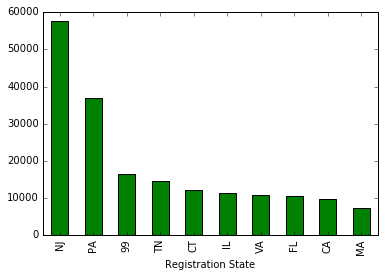

In [70]:
df_nonNY.groupby('Registration State')['new_areas'].sum().sort_values(ascending=False).head(10).plot(kind='bar',x='Registration State', color='green')

### 12. What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.

In [71]:
new_data.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'CODE', 'DEFINITION',
       '

In [72]:
test2_df['Violation Time'].head()

0    07:52 AM
1    12:40 PM
2    12:43 PM
3    14:32 PM
4    12:39 PM
Name: Violation Time, dtype: object

In [73]:
#new_data['Violation Time'] = test2_df['Violation Time']

In [74]:
violate_df['Violation Time']

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
5    0617P
6    0741P
7    0425A
8    0437A
9    0839A
Name: Violation Time, dtype: object

In [75]:
type(new_data['Violation Time'][0])

str

In [76]:
v_time = new_data['Violation Time']

In [77]:
v_time.head(10)

0    0752A
1    1240P
2    1243P
3    0232P
4    1239P
5    0617P
6    0741P
7    0425A
8    0437A
9    0839A
Name: Violation Time, dtype: object

In [78]:
def vio_date(time_str):
    parsed_date = dateutil.parser.parse(time_str)
    date_vio = parsed_date.strftime("%H:%M %p")
    return date_vio
    #return parsed_date.hour
print(vio_date("12:32 PM"))

12:32 PM


In [79]:
# 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am
count1 = []
count2 = []
count3 = []
count4 = []
count5 = []
z = [i for i in v_time]
#print(z)
for i in z:
    if i != None:
        #print(i)
        try:
            vio_date(i)
            #print(type(i))
            #print("finished printing i")
        except:
            pass
        

#print(type(z[0]))
for item in z:
    item = str(item)
    #print(type(item))
    
    if item < "06.00 AM":
        count1.append(item)
        #print(len(count1))
    if item < "12.00 PM":
        count2.append(item)
        
    if item < "06.00 PM":
        count3.append(item)
        
    if item < "12.00 AM":
        count4.append(item)
        

    #else:
        #count5.append(item)
#print(len(count5))
print(len(count4))
print(len(count3))
print(len(count2))
print(len(count1))

9101
3045
9101
3045


### 13. What's the average ticket cost in NYC?

In [80]:
#gives the Registration State wise ticket cost (new_areas) 
df_reg

,Registration State,new_areas
0,NY,45.0
1,NY,45.0
2,NY,45.0
3,NY,45.0
4,NY,65.0
5,NJ,115.0
6,NY,115.0
7,NJ,60.0
8,NY,60.0
9,NJ,60.0


In [81]:
df_reg.describe()

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,new_areas
count,9134.000000
mean,67.276111
std,52.092458
min,35.000000
25%,NaN
50%,NaN
75%,NaN
max,390.000000


### 14. Make a graph of the number of tickets per day.

In [82]:
new_data.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation', 'CODE', 'DEFINITION',
       '

In [83]:
# parsing to the daytime format. did earlier (dateutil.parser.parse(violate_df['Issue Date'][0])
new_data['Issue Date'] = test3_df['Issue Date']

In [84]:
new_data['Issue Date'].value_counts().head(10)

07/30/2013    435
08/05/2013    381
07/29/2013    369
07/23/2013    365
08/02/2013    338
07/31/2013    338
08/01/2013    334
07/25/2013    331
07/22/2013    329
07/26/2013    329
Name: Issue Date, dtype: int64

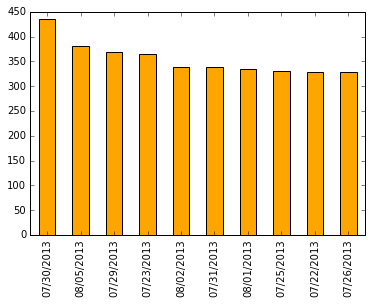

In [85]:
new_data['Issue Date'].value_counts().head(10).plot(kind='bar',x='Issue Date', color='orange')

### 15. Make a graph of the amount of revenue collected per day.

In [86]:
# since new data issue date is showing so many nan. i am going back to old data
new_data['Issue Date'] = test3_df['Issue Date']

In [87]:
new_data['Issue Date']

0       08/04/2013
1       08/04/2013
2       08/05/2013
3       08/05/2013
4       08/08/2013
5       08/11/2013
6       08/11/2013
7       08/07/2013
8       08/07/2013
9       07/18/2013
10      07/18/2013
11      07/18/2013
12      07/31/2013
13      08/12/2013
14      07/05/2013
15      08/12/2013
16      07/26/2013
17      07/30/2013
18      07/23/2013
19      07/29/2013
20      08/07/2013
21      07/20/2013
22      07/18/2013
23      07/20/2013
24      08/10/2013
25      07/26/2013
26      07/19/2013
27      08/06/2013
28      08/07/2013
29      08/06/2013
           ...    
9969    07/23/2013
9970    08/13/2013
9971    07/16/2013
9972    07/16/2013
9973    08/15/2013
9974    08/13/2013
9975    08/07/2013
9976    07/31/2013
9977    07/27/2013
9978    07/17/2013
9979    07/15/2013
9980    07/21/2013
9981    08/10/2013
9982    08/09/2013
9983    08/09/2013
9984    08/09/2013
9985    08/09/2013
9986    07/23/2013
9987    07/23/2013
9988    07/23/2013
9989    07/25/2013
9990    08/1

In [88]:
columns_to_show = ['Issue Date','new_areas']
new_data[columns_to_show].head()

,Issue Date,new_areas
0,08/04/2013,45.0
1,08/04/2013,45.0
2,08/05/2013,45.0
3,08/05/2013,45.0
4,08/08/2013,65.0


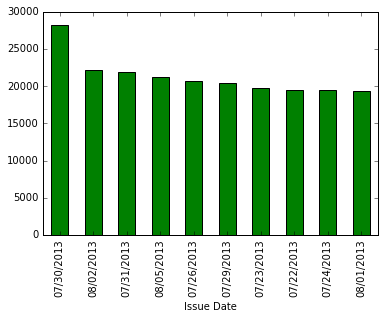

In [89]:
new_data.groupby('Issue Date')['new_areas'].sum().sort_values(ascending=False).head(10).plot(kind='bar',x='Issue Date', color='green')

### 16. Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.

In [90]:
df = pd.read_csv("borough.csv")
df

,County,Male,Female,Total
0,ALBANY,103989,107643,211632
1,ALLEGANY,16339,16245,32584
2,BROOME,67743,70054,137797
3,CATTARAUGUS,27550,27894,55444
4,CAYUGA,26028,26582,52610
5,CHAUTAUQUA,45279,46457,91736
6,CHEMUNG,29343,31379,60722
7,CHENANGO,18576,18434,37010
8,CLINTON,28429,29179,57608
9,COLUMBIA,24110,23843,47953


In [91]:
# bronx, queens, manhattan, staten island, brooklyn o

df[58: 63]

,County,Male,Female,Total
58,BRONX,259845,197002,456847
59,KINGS,555917,427852,983769
60,NEW YORK,399606,348977,748583
61,QUEENS,631912,502152,1134064
62,RICHMOND,156339,147911,304250


In [92]:
NYC = df[58: 63]

In [93]:
NYC['code'] = ["BX", "K", "NYC", "Q", "R"]

c:\users\radhika\appdata\local\programs\python\python35-32\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [94]:
NYC


,County,Male,Female,Total,code
58,BRONX,259845,197002,456847,BX
59,KINGS,555917,427852,983769,K
60,NEW YORK,399606,348977,748583,NYC
61,QUEENS,631912,502152,1134064,Q
62,RICHMOND,156339,147911,304250,R


### 17. What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!

In [95]:
columns_to_show = ['Violation County','new_areas']
new_data[columns_to_show]

,Violation County,new_areas
0,NaN,45.0
1,NY,45.0
2,NY,45.0
3,NY,45.0
4,NY,65.0
5,NY,115.0
6,NY,115.0
7,K,60.0
8,K,60.0
9,K,60.0


In [96]:
columns_to_show = ['Violation County','new_areas']
new_data[columns_to_show]

,Violation County,new_areas
0,NaN,45.0
1,NY,45.0
2,NY,45.0
3,NY,45.0
4,NY,65.0
5,NY,115.0
6,NY,115.0
7,K,60.0
8,K,60.0
9,K,60.0


In [97]:
county = new_data[columns_to_show]

In [98]:
county.groupby('Violation County')['new_areas'].sum().sort_values(ascending=False).head(10)

Violation County
K     172915.0
Q     148235.0
BX    134670.0
NY    129845.0
R       4875.0
Name: new_areas, dtype: float64